In [20]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [21]:
np.random.seed(123)

Load MNIST dataset.

In [22]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = tf.keras.datasets.mnist.load_data()

The training data consists of 60000 rows of 28x28 grayscale images. 

Let's take a look at its shape to confirm.

In [23]:
x_train_raw.shape

(60000, 28, 28)

Taking a quick look at the content of our training data.

In [24]:
np.set_printoptions(edgeitems=x_train_raw.shape[1])   # display non-truncated

x_train_raw

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,
           0,   0,   0

The labels are digit values that correspond to the images.

In [25]:
y_train_raw

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, ..., 0, 9, 2, 4, 6, 7, 3, 1, 3, 6, 6, 2, 1, 2, 6,
       0, 7, 8, 9, 2, 9, 5, 1, 8, 3, 5, 6, 8], dtype=uint8)

An individual training data has the following shape.

In [26]:
x_train_raw[0].shape

(28, 28)

Display content of an individual training data.

In [27]:
x_train_raw[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Display the images within the training data

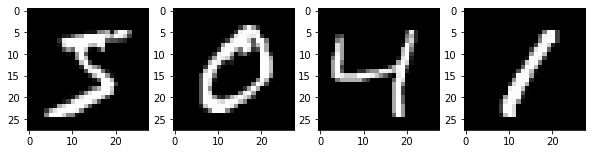

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10,5))

ax[0].imshow(x_train_raw[0], cmap='gray')
ax[1].imshow(x_train_raw[1], cmap='gray')
ax[2].imshow(x_train_raw[2], cmap='gray')
ax[3].imshow(x_train_raw[3], cmap='gray')

In [29]:
x_train_raw[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Reshape training and test data to a format that Tensorflow can accept for computation. 

A CNN takes tensors of shape (image_height, image_width, color_channels). For RBG images, the shape should be (image_height, image_width, 3). For grayscale images, the shape should be (image_height, image_width, 1).

Let's now reshape our grayscale images into (28, 28, 1).

In [30]:
x_train = np.reshape(x_train_raw, (x_train_raw.shape[0], 28, 28, 1))
x_test = np.reshape(x_test_raw, (x_test_raw.shape[0], 28, 28, 1))

In [31]:
x_train.shape

(60000, 28, 28, 1)

We have transformed individual training and test data to have the shape (28, 28, 1)

In [32]:
x_train[0].shape

(28, 28, 1)

An individual training and test data now looks like this.

In [33]:
x_train[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

Display how the new transformed data looks like.

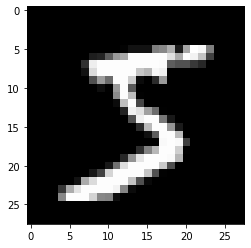

In [34]:
plt.imshow(x_train[0], cmap='gray')


Normalized the values by 255 as each "pixel" of our image can take a value between 0 to 255.

In [35]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [36]:
x_train_norm

array([[[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         

In [44]:
labels = np.unique(y_test_raw)
labels


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [45]:
n_labels = len(labels)
n_labels

10

One-hot encode our labels.

In [46]:
y_train_1hot = tf.keras.utils.to_categorical(y_train_raw, n_labels)
y_test_1hot = tf.keras.utils.to_categorical(y_test_raw, n_labels)

Take a look at the one-hot encoded data.

In [47]:
y_train_1hot

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 

Construct the architecture of our CNN.

In [90]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(filters=32,
    kernel_size=(5, 5),
    activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

Specify hyper-parameters.

In [91]:
model.compile(loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

Train our CNN model.

In [92]:
hist = model.fit(x=x_train, y=y_train_1hot, batch_size=512, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 61s 1ms/sample - loss: 1.2028 - acc: 0.7974
Epoch 2/10
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.1892 - acc: 0.9441
Epoch 3/10
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.1356 - acc: 0.9602
Epoch 4/10
60000/60000 [==============================] - 60s 997us/sample - loss: 0.1040 - acc: 0.9695
Epoch 5/10
60000/60000 [==============================] - 60s 996us/sample - loss: 0.0900 - acc: 0.9727
Epoch 6/10
60000/60000 [==============================] - 60s 996us/sample - loss: 0.0774 - acc: 0.9768
Epoch 7/10
60000/60000 [==============================] - 60s 996us/sample - loss: 0.0679 - acc: 0.9787
Epoch 8/10
60000/60000 [==============================] - 60s 994us/sample - loss: 0.0658 - acc: 0.9805
Epoch 9/10
60000/60000 [==============================] - 60s 995us/sample - loss: 0.0568 - acc: 0.9826
Epoch 10/10
60000/60000 [======================

Test our CNN model and perform evaluation.

In [93]:
loss, accuracy = model.evaluate(x=x_test, y=y_test_1hot)

print('loss =', loss)
print('accuracy =', accuracy)

loss = 0.033728172872360254
accuracy = 0.9891


Plot the loss and accuracy.

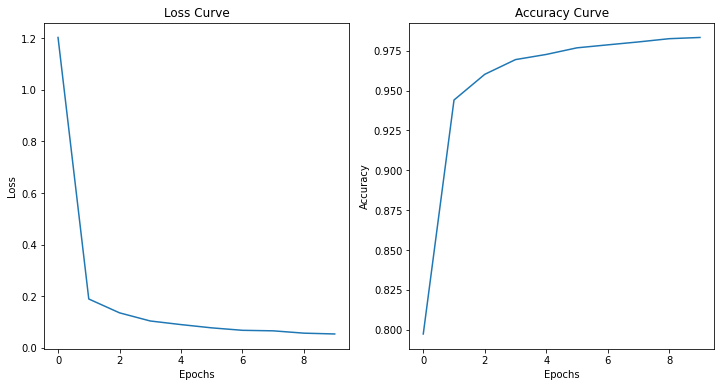

In [94]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].plot(hist.history['loss'])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss Curve')

ax[1].plot(hist.history['acc'])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy Curve')

plt.show()